# Train / Test

Zuerst erstellen wir ein paar Zufallsdaten für die wir anschließend ein Modell bauen werden (in diesem Fall eine polynomiale Regression): 

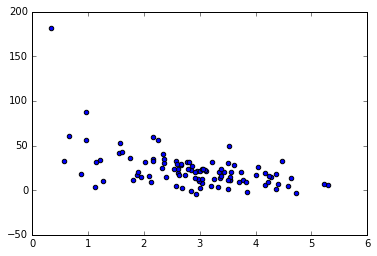

In [3]:
%matplotlib inline
import numpy as np
from pylab import *

np.random.seed(2)

pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds


scatter(pageSpeeds, purchaseAmount)

Jetzt teilen wir die Daten in 2 Hälften. 80% werden zum "trainieren" unseres Modells benutzt, die restlichen 20% um unser Modell zu testen. Dadurch können wir Überanpassung (overfitting) vermeiden.

In [4]:
trainX = pageSpeeds[:80]
testX = pageSpeeds[80:]

trainY = purchaseAmount[:80]
testY = purchaseAmount[80:]


Grafik unserer Trainingsdaten:

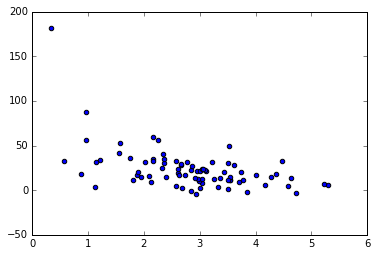

In [5]:
scatter(trainX, trainY)

Und eine Grafik unserer Testdaten:

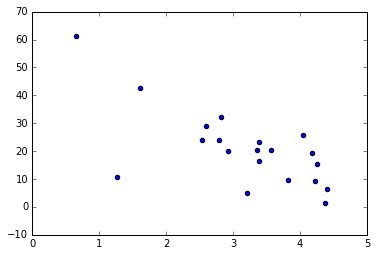

In [6]:
scatter(testX, testY)

Versuchen wir jetzt, ein Polynom 8. Ordnung durch diese Punkte zu erstellen (damit führen wir auf jeden Fall eine Überanpassung durch, die Daten sind garantiert nicht so komplex, wir haben sie ja selbst generiert und wissen wie sie erstellt wurden):

In [10]:
x = np.array(trainX)
y = np.array(trainY)

p4 = np.poly1d(np.polyfit(x, y, 8))

Zeigen wir jetzt das Polynom zusammen mit unseren Trainingsdaten in einer Grafik an:

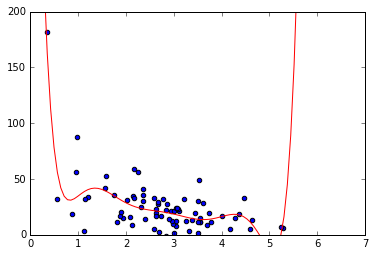

In [12]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()


Und machen selbiges nochmal mit für unsere Testdaten:

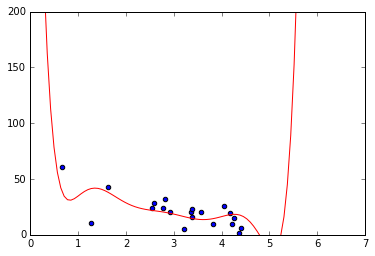

In [13]:
testx = np.array(testX)
testy = np.array(testY)

axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0, 200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

Auf den ersten Blick sieht es gar nicht mal so schlecht aus... aber der Wert für r-Quadrat bei die Testdaten ist nicht akzeptabel! Daraus können wir schließen, dass unser Modell nicht wirklich gut ist!

In [14]:
from sklearn.metrics import r2_score

r2 = r2_score(testy, p4(testx))

print(r2)


0.300181686118


... wobei r-Quadrat sehr viel besser ist wenn wir damit nur unsere Trainingsdaten testen:

In [15]:
from sklearn.metrics import r2_score

r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.642706951469


Hinweis: Wenn du später Tabellen mit Hilfe des Pandas paket auswertes, schau dir auf jeden Fall das scikit-learn - Paket an. Dort gibt es die Methode "train_test_split", die dich bei einem solchen Test unterstützt. 

Wir werden uns später auch noch weitere Methoden anschauen um ein Modell zu trainieren und anschließend zu validieren, beispielsweise das Kreuzvalidierungsverfahren (k-fold cross-validation). Dabei versucht man, verschiedene Trainingsdaten zu verwenden, sodass man sich nicht auf sein Glück verlassen muss die richtigen Trainings / Testdaten ausgewählt zu haben :) 

## Aufgabe

Probier auch noch ein paar Polynome mit anderer Ordnung als 8 aus. Welche Ordnung funktioniert am Besten? 